In [1]:
# importing requierd libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

data = pd.read_csv('C:/Users/user/Desktop/bank-full.csv', sep=';')
print('Shape of our data {}'.format(data.shape))


Shape of our data (45211, 17)


In [8]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [10]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

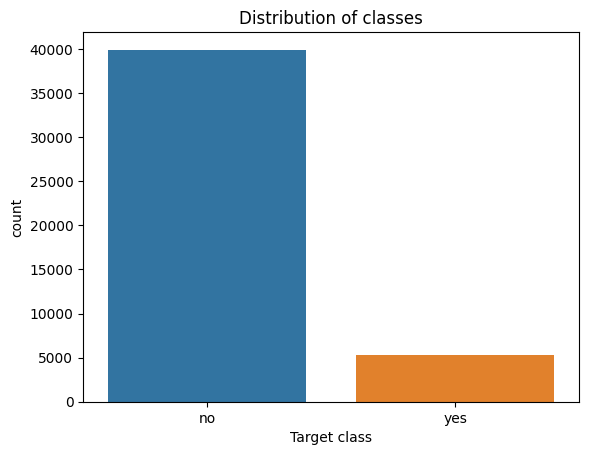

In [11]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [12]:
data.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## Data Analysis

pdays

Text(0.5, 0, 'y:target variable')

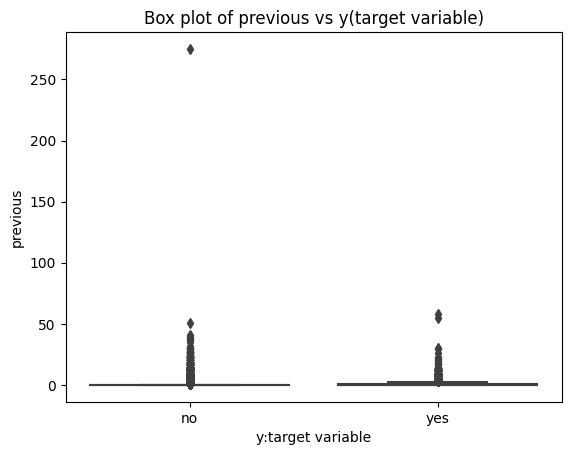

In [13]:
sns.boxplot(y=data['previous'], x=data['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

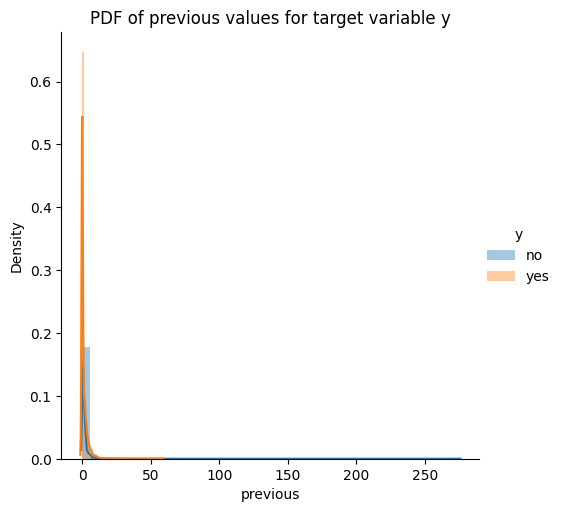

In [14]:


sns.FacetGrid(data, hue='y', height=5) \
    .map(sns.distplot, 'previous') \
    .add_legend()

plt.title('PDF of previous values for target variable y')
plt.show()


In [15]:
data.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [16]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, data.previous.quantile(x/100)))
iqr = data.previous.quantile(0.75) - data.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.900000000001455
100% of previous values less than equal to 275.0
IQR 0.0


## Age

Text(0.5, 0, 'y:target variable')

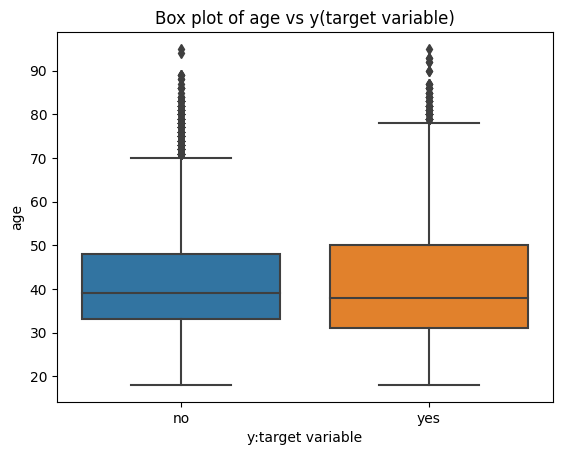

In [17]:
sns.boxplot(y=data['age'], x=data['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

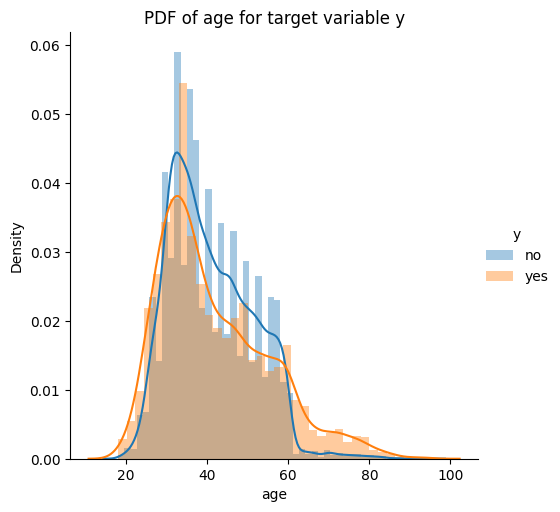

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.FacetGrid(data, hue='y', height=5) \
    .map(sns.distplot, 'age') \
    .add_legend()

plt.title('PDF of age for target variable y')
plt.show()


In [19]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [20]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [21]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [22]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<Axes: xlabel='age_group', ylabel='count'>

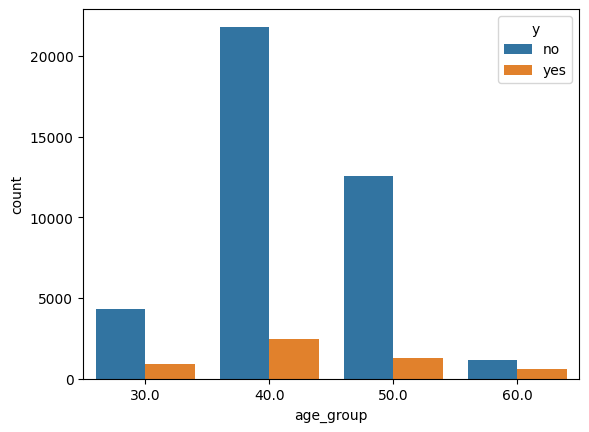

In [23]:
sns.countplot(x='age_group', data=data, hue='y')

In [24]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {:.6f}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {:.6f}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {:.6f}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {:.6f}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))


Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.175991
Clients of age 30-45 contacted: 24274, Success rate: 0.101178
Clients of age 40-60 contacted: 13880, Success rate: 0.094020
Clients of 60+ age contacted: 1784, Success rate: 0.336323


 Observation

* People with age < 30 or 60+ have higher success rate.
* Only 3% of clients have age of 60+

## Jobs

In [25]:
data.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

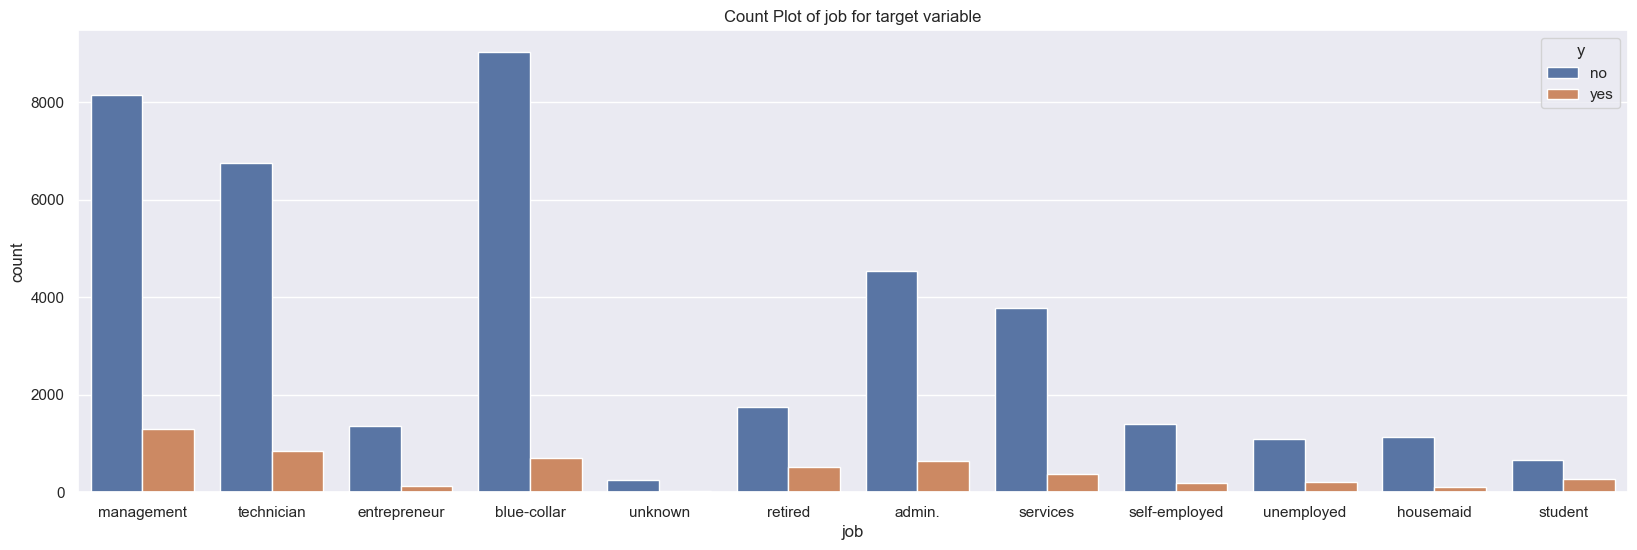

In [26]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['y'])
plt.title('Count Plot of job for target variable')

In [27]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].y.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].y.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].y.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin.']), data[data['job'] == 'admin.'].y.value_counts()[1]/len(data[data['job'] == 'admin.'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].y.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].y.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].y.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].y.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].y.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].y.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].y.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].y.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


 Observation
* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
* Success rate is highest for student

## Poutcome

In [28]:
data.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

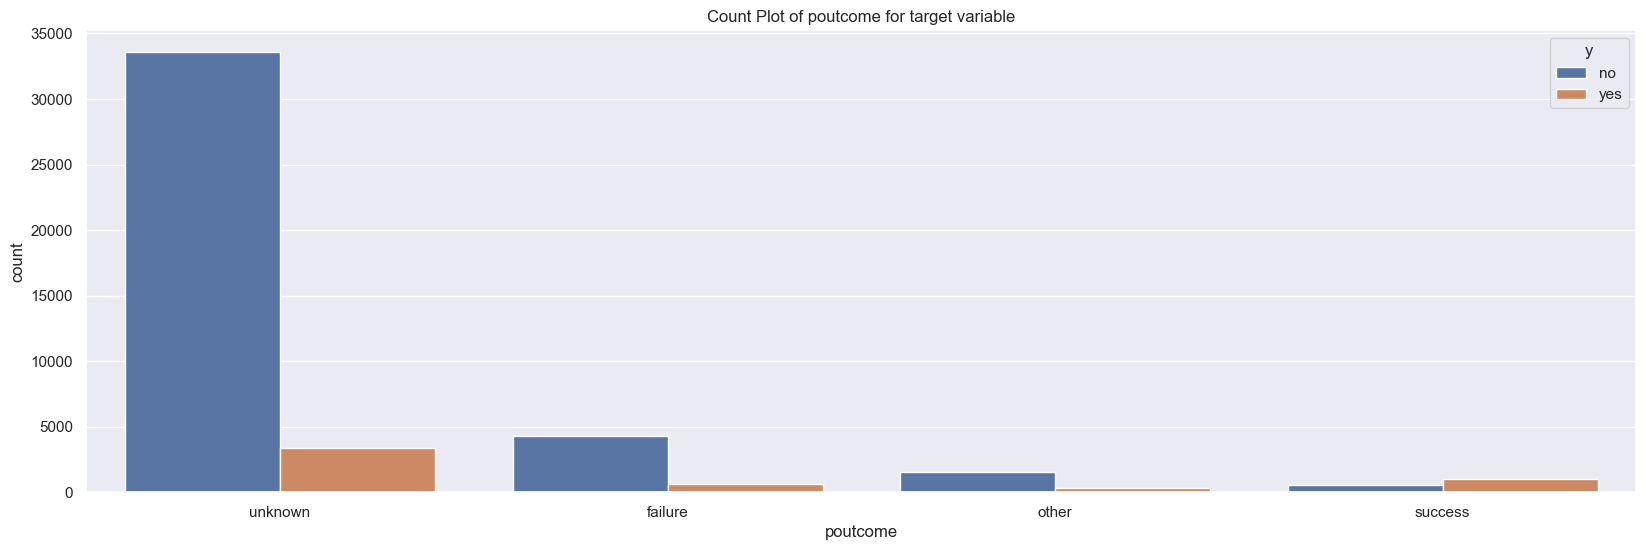

In [29]:
sns.countplot(x=data['poutcome'], data=data, hue=data['y'])
plt.title('Count Plot of poutcome for target variable')

## Observation
* Most of the clients contacted have previous outcome as 'unknown'.

## education

In [30]:
data.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

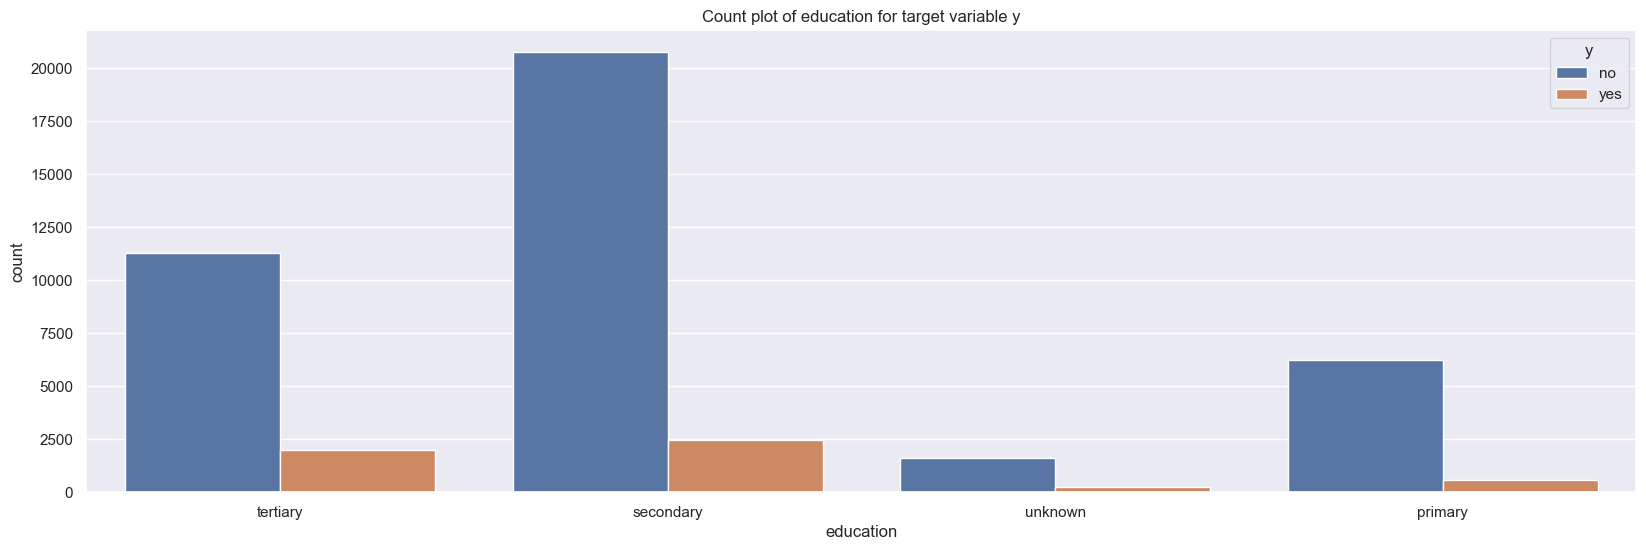

In [31]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y')

## Observation
*Most of the people who are contacted have tertiray or secondary education.

## Default

In [32]:
data.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable y')

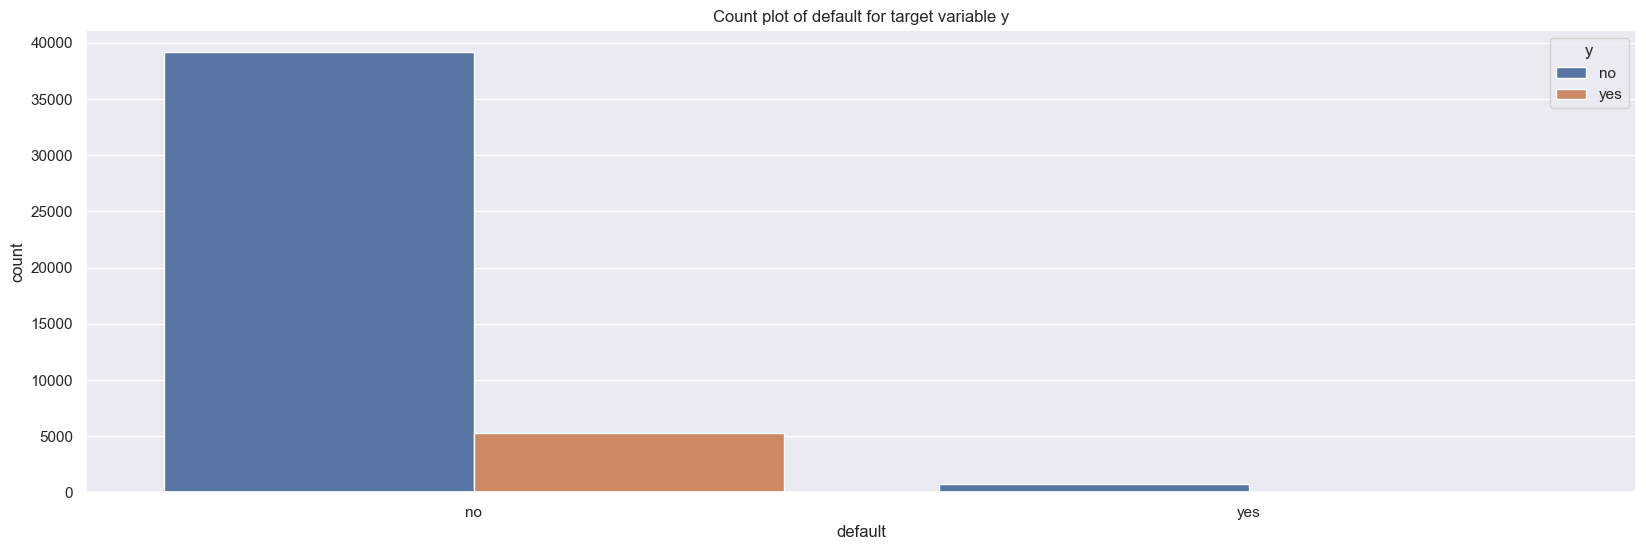

In [33]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y')

In [34]:
data[data['default'] == 'yes'].y.count()

815

Observation:
Very few clients are contacted who are defaulter,

## Loan

In [35]:
data.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

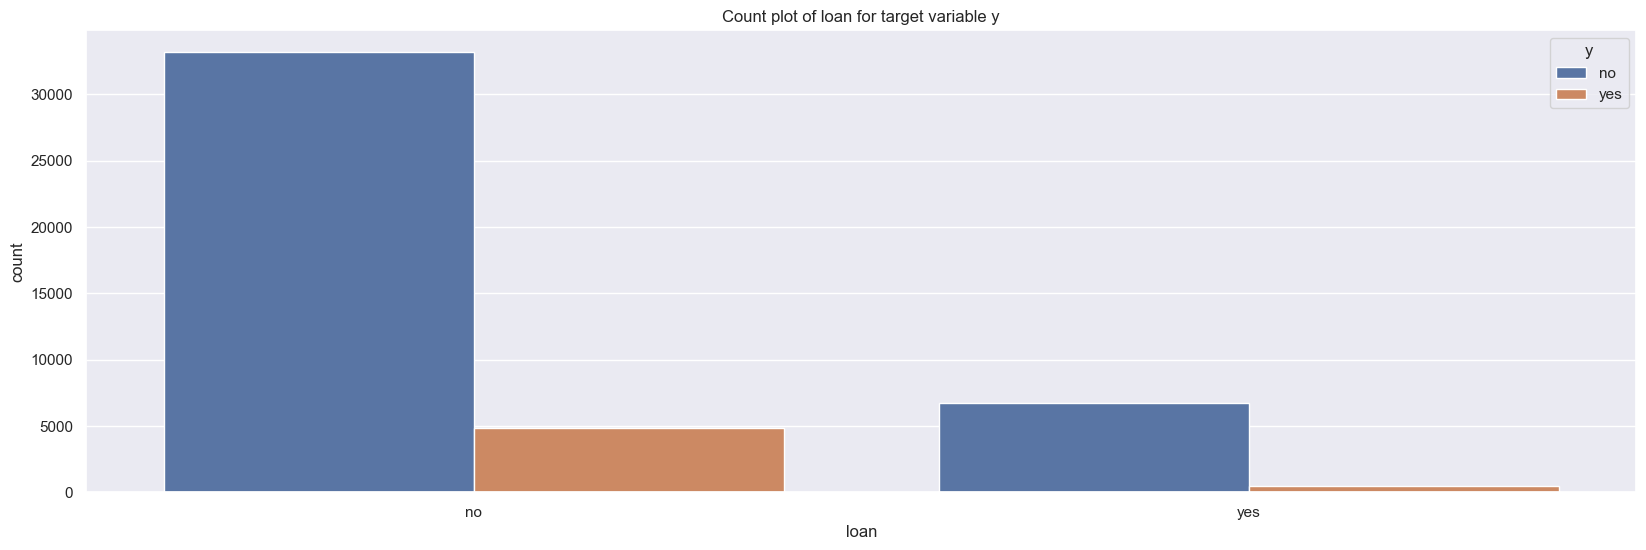

In [36]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y')

Observation:

As seen for default variable, less client are contacted who have loan.

## contact

In [37]:
data.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable y')

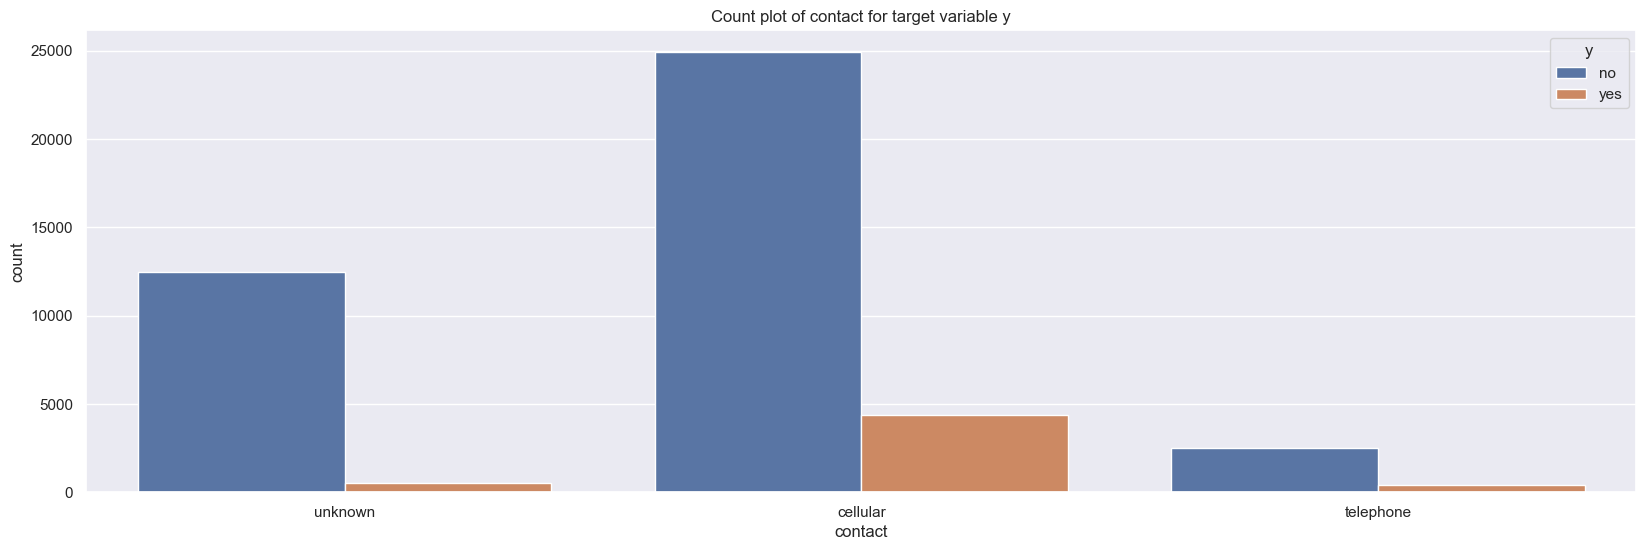

In [38]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y')

Observation:
Most of the people are contacted through cellular

## Month

In [39]:
data.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable y')

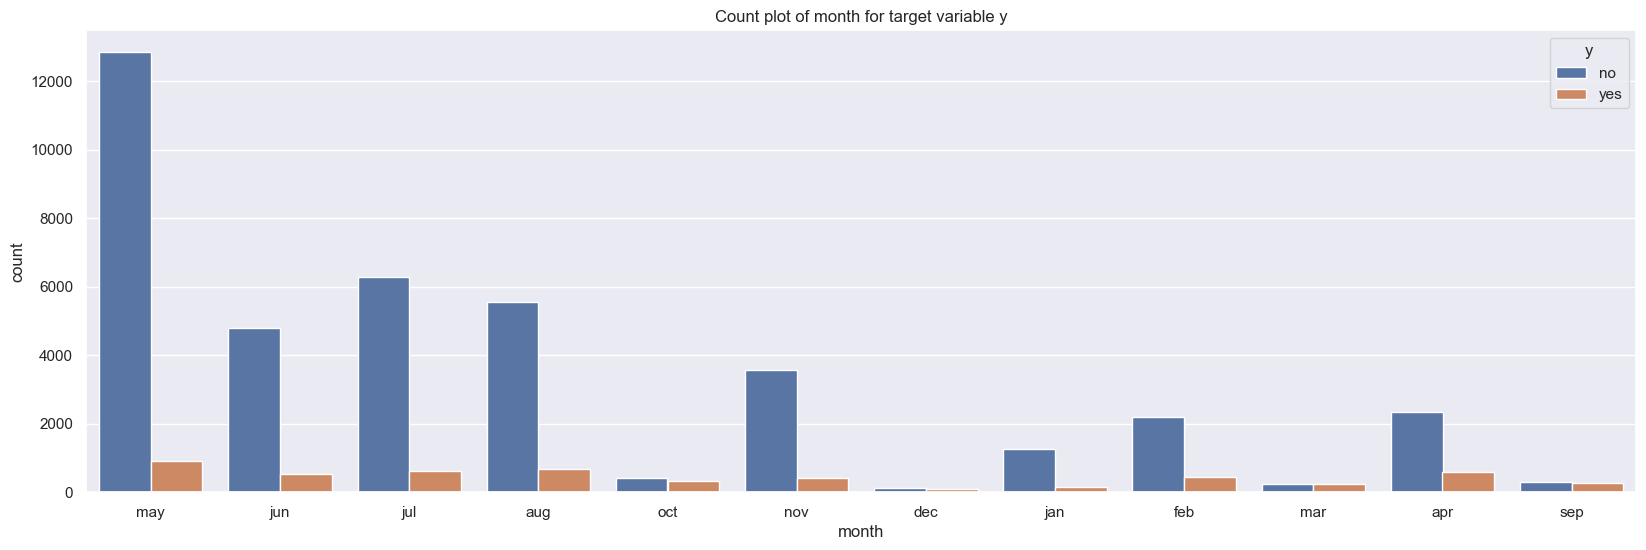

In [40]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y')

In [41]:
data[data['month'] == 'jan'].y.value_counts()

y
no     1261
yes     142
Name: count, dtype: int64

In [42]:


months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for month in months:
    clients_contacted = len(data[data['month'] == month])
    success_rate = data[data['month'] == month].y.value_counts().get(1, 0) / clients_contacted

    print('Clients contacted in {}: {}, Success rate: {:.17f}'.format(month.capitalize(), clients_contacted, success_rate))


Clients contacted in Jan: 1403, Success rate: 0.10121168923734854
Clients contacted in Feb: 2649, Success rate: 0.16647791619479049
Clients contacted in Mar: 477, Success rate: 0.48008385744234799
Clients contacted in Apr: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in Jun: 5341, Success rate: 0.10222804718217562
Clients contacted in Jul: 6895, Success rate: 0.09093546047860769
Clients contacted in Aug: 6247, Success rate: 0.11013286377461182
Clients contacted in Sep: 579, Success rate: 0.46459412780656306
Clients contacted in Oct: 738, Success rate: 0.43766937669376693
Clients contacted in Nov: 3970, Success rate: 0.10151133501259446
Clients contacted in Dec: 214, Success rate: 0.46728971962616822


Observation:

Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
March have highest success rate.

## Pairplot

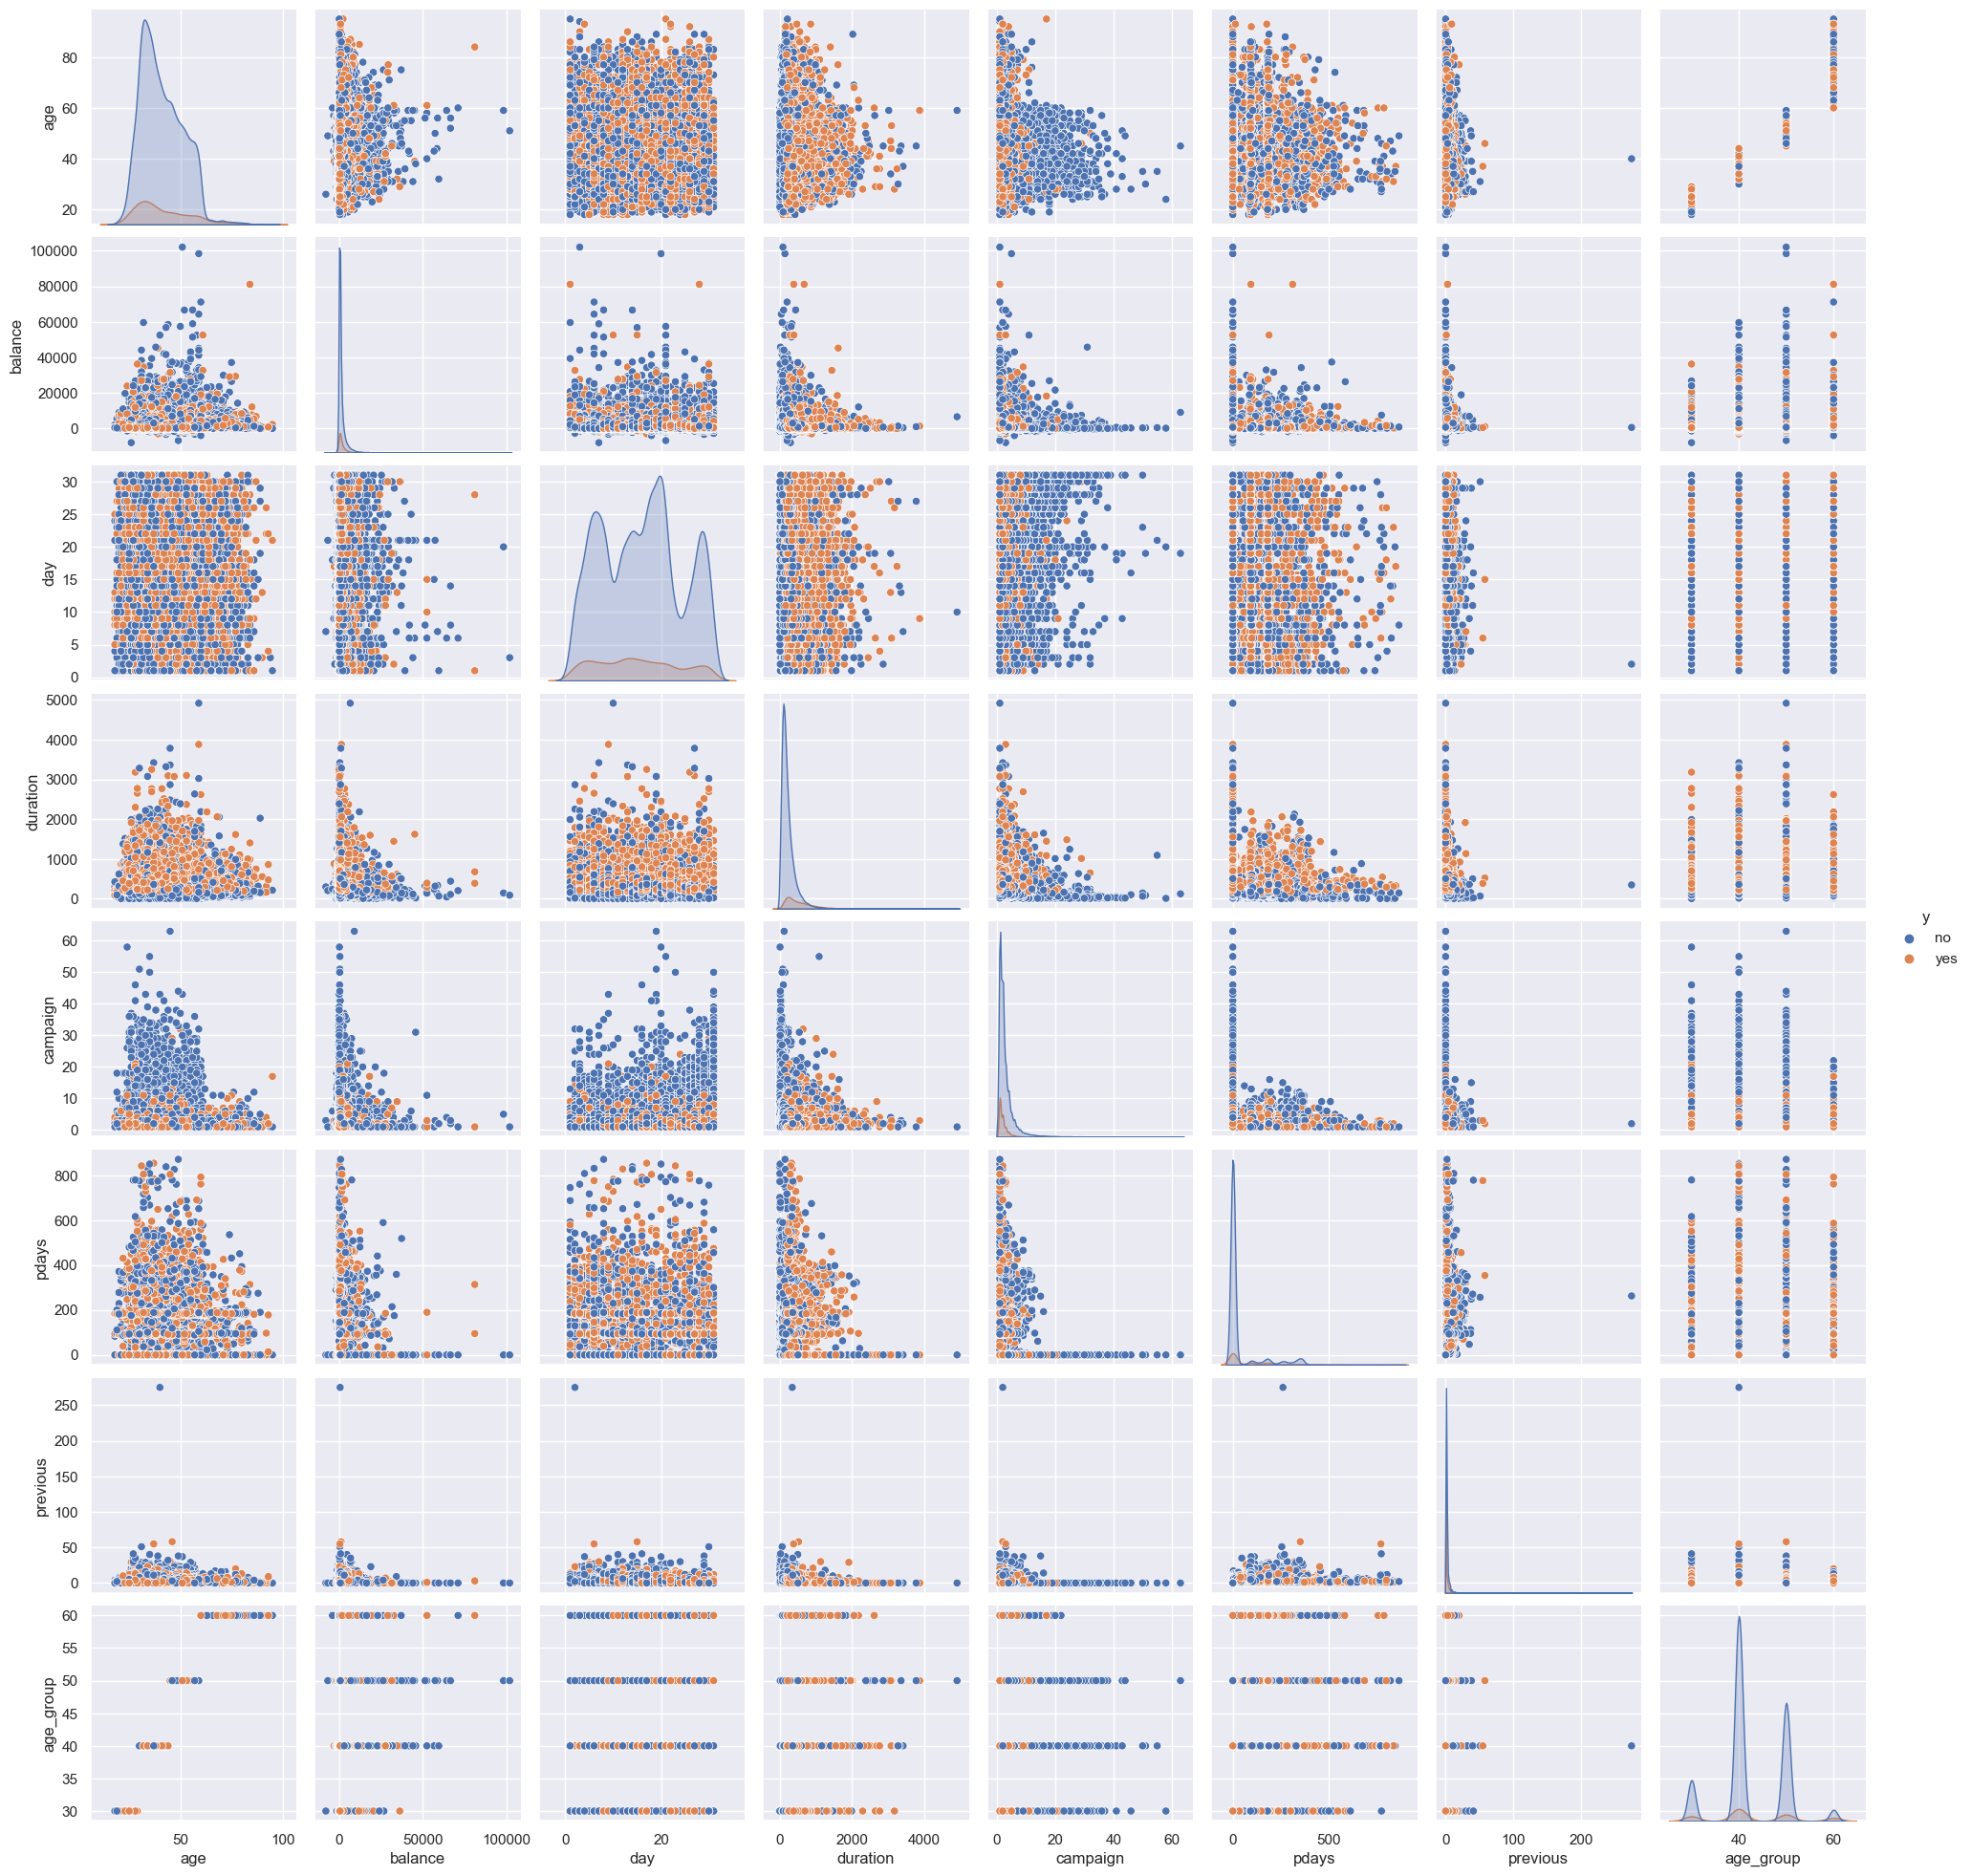

In [43]:
#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(data, hue='y')

Observation:

For most of the variables our pair plot is overlapping a lot.
Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

## Correlation matrix of numerical features

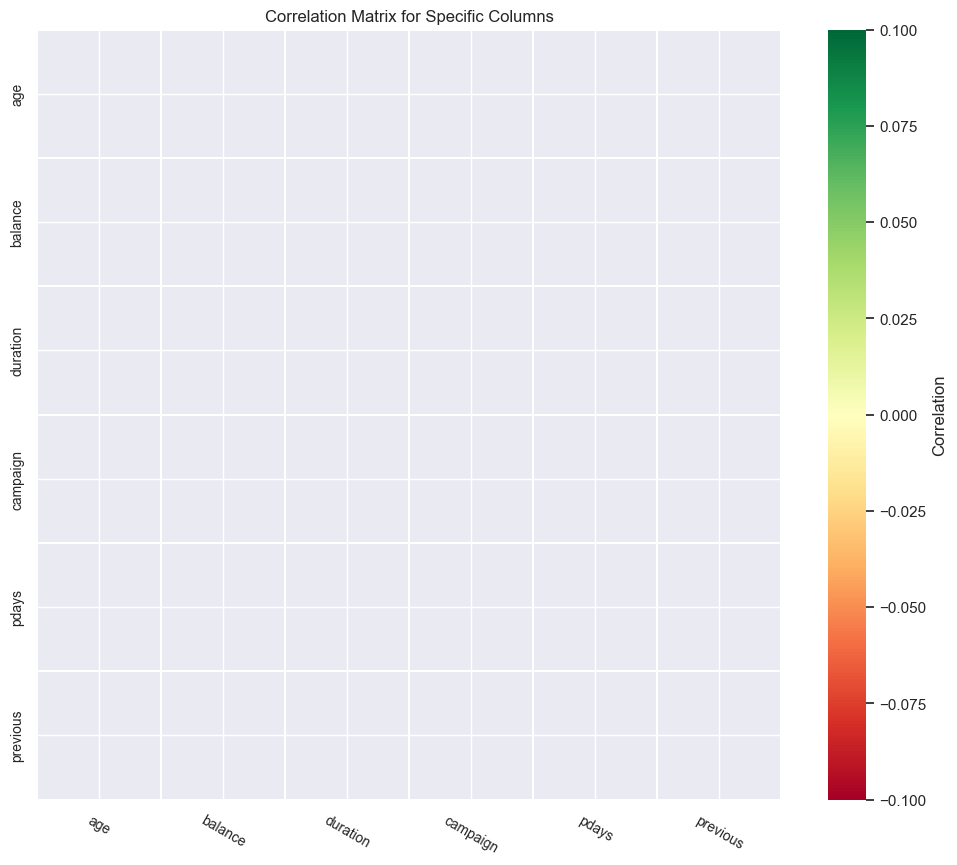

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define numerical columns
numerical = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Check if the columns exist in your DataFrame
if set(numerical + ['y']).issubset(data.columns):
    # Select relevant columns
    corr_data = data[numerical + ['y']]
    
    # Convert to numeric (handle non-convertible values as NaN)
    corr_data = corr_data.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with NaN values
    corr_data = corr_data.dropna()
    
    # Calculate correlation matrix
    corr_subset = corr_data[numerical].corr()

    # Plot the heatmap with direct annotations
    plt.close()
    fig, ax = plt.subplots(figsize=(12, 10))
    cor_plot = sns.heatmap(corr_subset, annot=corr_subset.values, cmap='RdYlGn', linewidths=0.2, fmt=".2f", cbar_kws={'label': 'Correlation'})
    plt.xticks(fontsize=10, rotation=-30)
    plt.yticks(fontsize=10)
    plt.title('Correlation Matrix for Specific Columns')
    
    # Show plot
    plt.show()
else:
    print("Columns not found in the DataFrame.")


In [45]:
# creating new data frame of numerical columns 
data_numerical = data[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 6)


,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [46]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [47]:
# Assuming you have calculated q1, q3, and iqr beforehand for your numerical columns
q1 = data_numerical.quantile(0.25)
q3 = data_numerical.quantile(0.75)
iqr = q3 - q1

# Identify and remove outliers based on IQR
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) | (data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]

# Print the number of removed outliers
num_outliers = data.shape[0] - data_out.shape[0]
print('{} points are outliers based on IQR'.format(num_outliers))


17018 points are outliers based on IQR


In [48]:
# Assuming you have calculated q1, q3, and iqr beforehand for your numerical columns
q1 = data_numerical.quantile(0.25)
q3 = data_numerical.quantile(0.75)
iqr = q3 - q1

# Identify and remove outliers based on IQR
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) | (data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]

# Print the number of removed outliers
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))


17018 points are outliers based on IQR


In [49]:
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

17018 points are outliers based on IQR


## Preprocessing
Train Test Split

In [50]:
data.replace(to_replace={'y':'yes'}, value=1, inplace=True)
data.replace(to_replace={'y':'no'}, value=0, inplace=True)

In [51]:
# Convert the columns into categorical variables
data1 = data.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [52]:
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(data.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

In [53]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 17) (36168,)
Test data shape (9043, 17) (9043,)


## Feature Importance

In [54]:
print(x_train.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'age_group'],
      dtype='object')


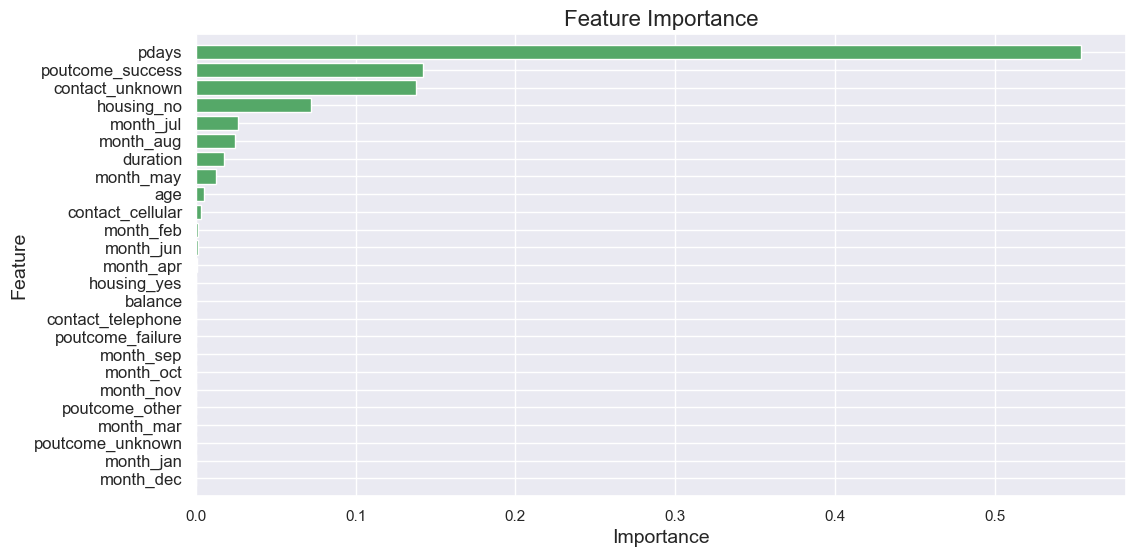

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_train is your feature DataFrame and y_train is your target Series

# Specify the features you want to include
selected_features = ['duration', 'contact', 'poutcome', 'month', 'housing', 'pdays', 'balance', 'age']

# Identify categorical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns

# Identify selected features that are categorical
categorical_selected_features = list(set(selected_features) & set(categorical_columns))

# Identify selected features that are numerical
numerical_selected_features = list(set(selected_features) - set(categorical_selected_features))

# Create a transformer for one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_selected_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the decision tree classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01))
])

# Fit the pipeline
pipeline.fit(x_train[selected_features], y_train)

# Extract feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

# Get feature names after one-hot encoding
feature_names = (
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_selected_features))
    + numerical_selected_features
)

# Sort indices
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance", fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='g', align="center")
plt.yticks(range(len(indices)), np.array(feature_names)[indices], rotation='horizontal', fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.ylim([-1, len(indices)])

plt.show()


### K-NN Method Implementation With Tuned Hypeparameter

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing  # label encoder library
from sklearn.preprocessing import StandardScaler  # for normalizing features
from sklearn.metrics import classification_report  # for evaluating performance of model
from sklearn.metrics import confusion_matrix

In [57]:
data.duplicated().any()  # check for any duplicate

False

In [58]:
numerical = data.select_dtypes(exclude = ['object'])      # dataset with numerical attributes
categorical = data.select_dtypes(include = ['object'])    # dataset with category attributes

In [59]:
numerical.head()                                # check for first 5 rows

,age,balance,day,duration,campaign,pdays,previous,y,age_group
0,58,2143,5,261,1,-1,0,0,50.0
1,44,29,5,151,1,-1,0,0,40.0
2,33,2,5,76,1,-1,0,0,40.0
3,47,1506,5,92,1,-1,0,0,50.0
4,33,1,5,198,1,-1,0,0,40.0


In [60]:
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [61]:
le = preprocessing.LabelEncoder()
le_categorical = categorical.apply(le.fit_transform)  # change categorical to numeric labels

In [62]:
le_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


In [63]:
from sklearn.feature_selection import chi2     # for checking feature importance in categorical 

In [64]:
# Check the column names in le_categorical
print(le_categorical.columns)

# Verify if 'y' is present in the column names
if 'y' in le_categorical.columns:
    print("'y' column found.")
else:
    print("'y' column not found.")

# Display a few rows of le_categorical to inspect its contents
print(le_categorical.head())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
'y' column not found.
   job  marital  education  default  housing  loan  contact  month  poutcome
0    4        1          2        0        1     0        2      8         3
1    9        2          1        0        1     0        2      8         3
2    2        1          1        0        1     1        2      8         3
3    1        1          3        0        1     0        2      8         3
4   11        2          3        0        0     0        2      8         3


In [65]:
from scipy.stats import chi2_contingency

# Assuming x and y are categorical variables
chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(x, y))


In [66]:
from scipy.stats import chi2_contingency

# Assuming x and y are categorical variables
chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(x, y))


In [67]:
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris

# Load example data (replace this with your actual data)
iris = load_iris()
X = iris.data
y = iris.target

# Use chi2 function
chi_scores, p_values = chi2(X, y)


In [68]:
import numpy as np
from sklearn.feature_selection import chi2

# Assuming x is a single-dimensional array
x = np.array([100, 200, 150, 120])  # Replace with your actual data

# Reshape x to a 2D array
x_reshaped = x.reshape(-1, 1)

# Assuming y is a target variable (replace with your actual data)
y = np.array([1, 0, 1, 0])

# Perform chi-squared test
chi_scores, p_values = chi2(x_reshaped, y)

# Print the results
print("Chi-squared scores:", chi_scores)
print("p-values:", p_values)


Chi-squared scores: [8.59649123]
p-values: [0.00336811]


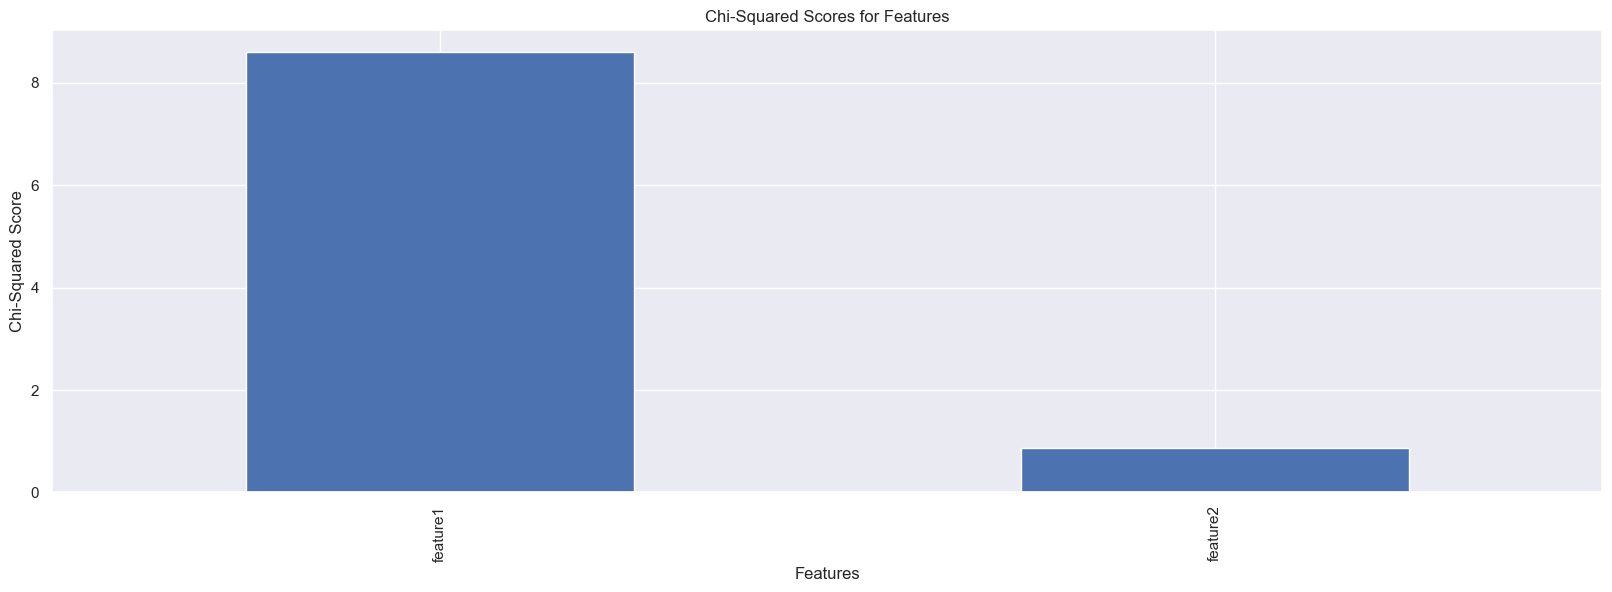

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Assuming x is a DataFrame with multiple columns
data = {
    'feature1': [100, 200, 150, 120],
    'feature2': [10, 20, 15, 12],
    # Add more features as needed
}

x = pd.DataFrame(data)

# Assuming y is a target variable
y = np.array([1, 0, 1, 0])

# Perform chi-squared test
chi_scores, p_values = chi2(x, y)

# Create a Series with chi-squared scores and feature names
chi_values = pd.Series(chi_scores, index=x.columns)

# Sort the Series in descending order
chi_values.sort_values(ascending=False, inplace=True)

# Plot the chi-squared scores
chi_values.plot(kind='bar')
plt.title('Chi-Squared Scores for Features')
plt.xlabel('Features')
plt.ylabel('Chi-Squared Score')
plt.show()


<Axes: >

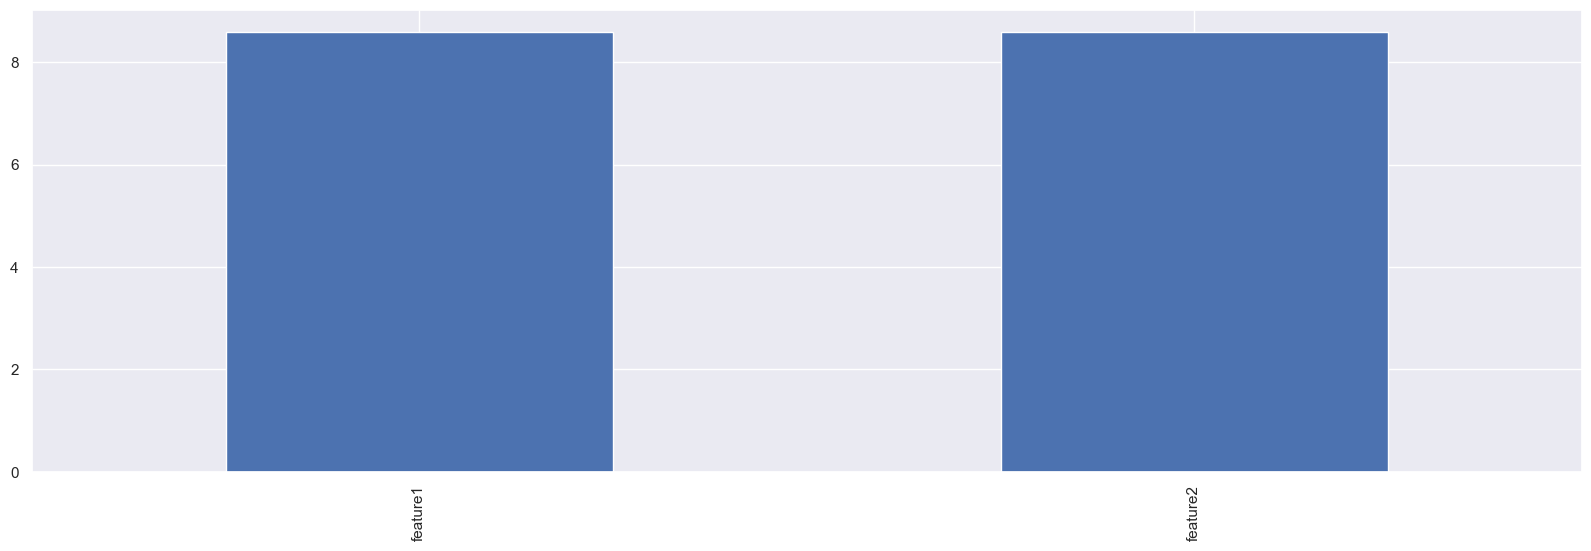

In [70]:
chi_values = pd.Series(chi_scores[0], index = x.columns)    # higher score, more important feature
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot(kind = 'bar')

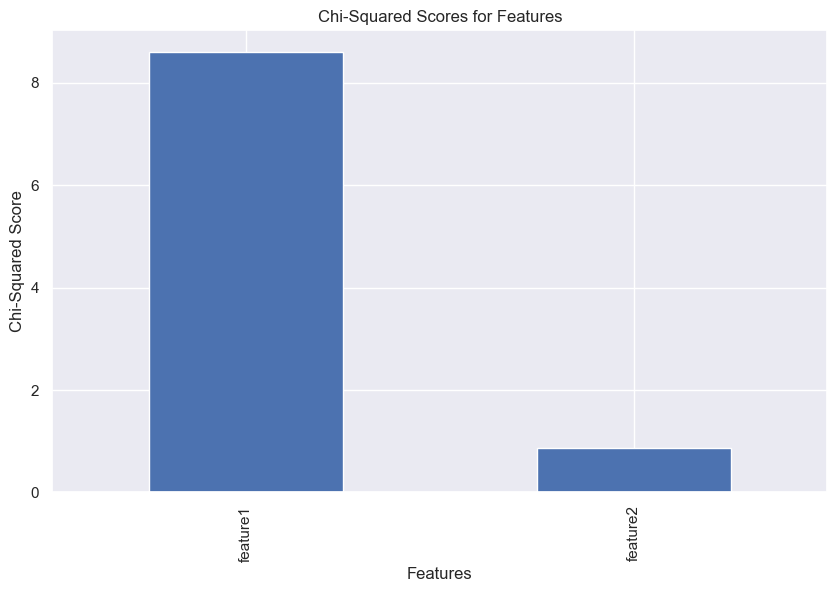

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Assuming x is a DataFrame with multiple columns
data = {
    'feature1': [100, 200, 150, 120],
    'feature2': [10, 20, 15, 12],
    # Add more features as needed
}

x = pd.DataFrame(data)

# Assuming y is a target variable
y = np.array([1, 0, 1, 0])

# Perform chi-squared test
chi_scores, p_values = chi2(x, y)

# Create a Series with chi-squared scores and feature names
chi_values = pd.Series(chi_scores, index=x.columns)

# Sort the Series in descending order
chi_values.sort_values(ascending=False, inplace=True)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the chi-squared scores
chi_values.plot(kind='bar', ax=ax)
ax.set_title('Chi-Squared Scores for Features')
ax.set_xlabel('Features')
ax.set_ylabel('Chi-Squared Score')

plt.show()


<Axes: >

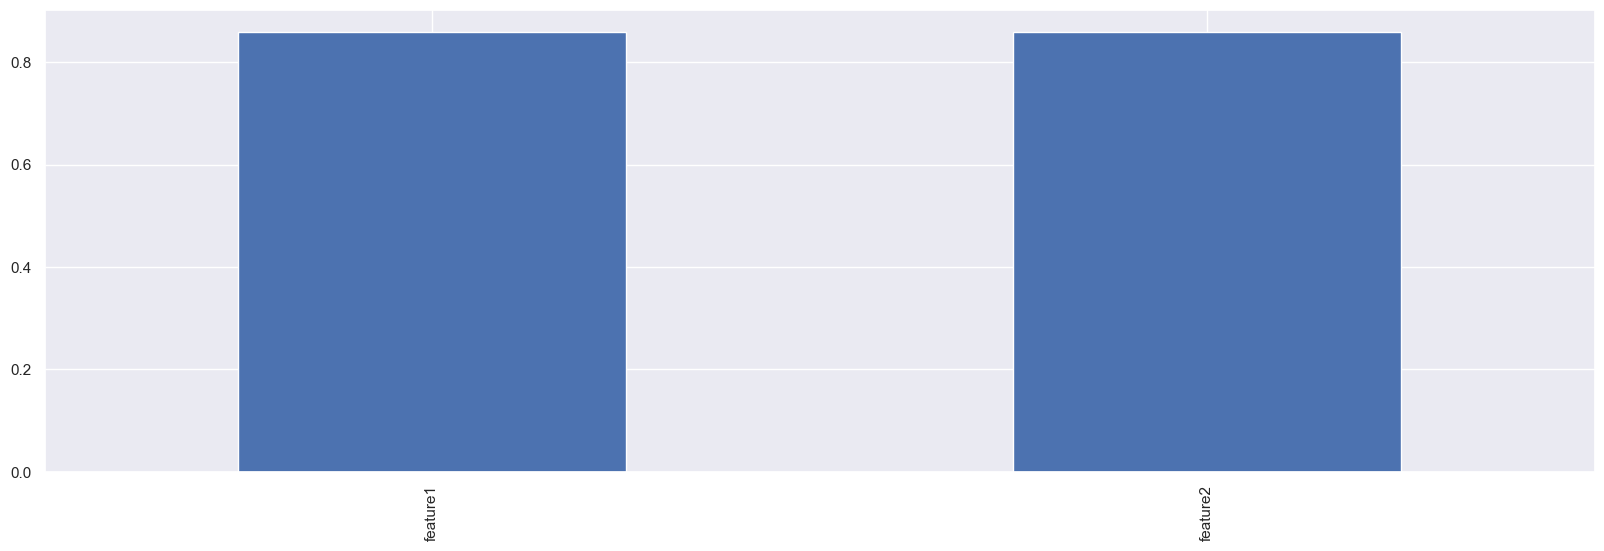

In [72]:
chi_values = pd.Series(chi_scores[1], index = x.columns)    # lower  p_value , more important feature
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot(kind = 'bar')

In [73]:
df = pd.concat([numerical, le_categorical], axis = 1, join = 'inner')  # combining two dataframes 
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,age_group,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,0,50.0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,0,40.0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,0,40.0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,0,50.0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,0,40.0,11,2,3,0,0,0,2,8,3


In [74]:
df.shape

(45211, 18)

In [75]:
X = df.drop('y', axis = 1)        # input variables
y = df['y']                       # target variable

In [76]:
scaler = StandardScaler().fit(X)

In [77]:
X_scaled = scaler.transform(X)

In [78]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [79]:
X_scaled.head()

,age,balance,day,duration,campaign,pdays,previous,age_group,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,1.024245,-0.103820,-0.275762,1.036362,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.377472,1.424008,1.368372,-0.300556,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.377472,-0.714951,-0.275762,-0.300556,-0.13549,0.893915,2.289359,1.514306,0.823773,0.444898
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,1.024245,-1.020516,-0.275762,2.373280,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.377472,2.035139,1.368372,2.373280,-0.13549,-1.118674,-0.436803,1.514306,0.823773,0.444898


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 2022, stratify = y)

<Axes: >

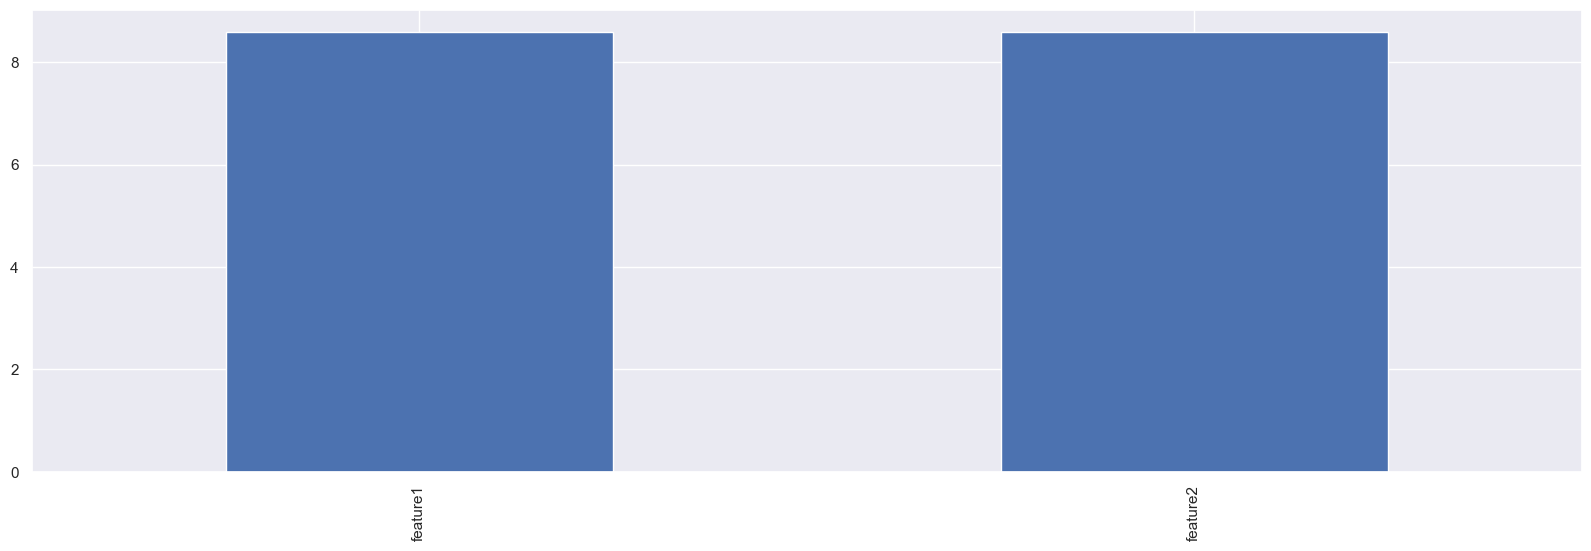

In [81]:
chi_values = pd.Series(chi_scores[0], index = x.columns)    # higher score, more important feature
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot(kind = 'bar')

### 1. Hyperparameter Tuning for K value

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV    # for hyperparameter tuning

In [83]:
k = np.random.randint(1, 50, 60)

In [84]:
param_grid = {'n_neighbors': k}
knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 5, n_iter = 5, n_jobs = -1, verbose = 0)

In [85]:
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([13, 45,  4, 41, 23, 49, 12, 38,  8, 43, 35, 28,  2, 19, 42, 14,  3,
       34, 46, 39, 36,  7, 41, 44, 20,  6, 15, 15, 49, 19, 18, 14,  1, 41,
        1, 28, 34, 24,  7, 24, 12, 13, 48, 30, 20, 44, 49, 28, 44, 12,  1,
       47,  5, 18, 36, 34, 16, 39, 47, 30])})

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust parameters as needed

# Configure cross-validation
knn_cv = cross_val_score(knn_classifier, X_train, y_train, cv=5)  # Adjust the number of folds (cv) as needed

# Fit the model
knn_classifier.fit(X_train, y_train)

# Print the cross-validation scores
print("Cross-validation scores:", knn_cv)

# Make predictions
y_pred = knn_classifier.predict(X_train)

# Further analysis as needed


Cross-validation scores: [0.95833333 0.95833333 0.83333333 1.         0.95833333]


In [94]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load your dataset or use a sample dataset (e.g., Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_dist = {'n_neighbors': np.arange(1, 50)}

# Create RandomizedSearchCV
knn_cv = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to the data
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)


Best parameters:  {'n_neighbors': 2}
Best score:  0.95


In [95]:
knn_cv.best_score_                         #    the  best score 

0.95

In [96]:
err = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err.append(np.mean(pred_i != y_test))

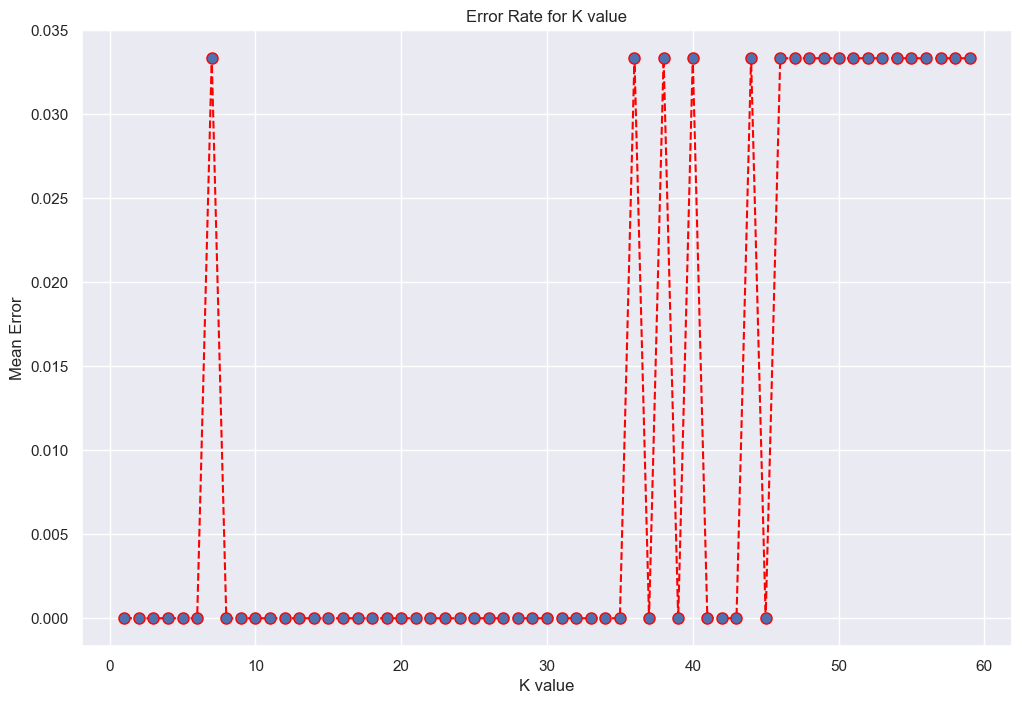

In [97]:
plt.figure(figsize = (12, 8))
plt.plot(range(1,60), err, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'b', markersize = 8)
plt.title('Error Rate for K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()


In [98]:
knn = KNeighborsClassifier(n_neighbors = 17)  #  17-nn classifier

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [100]:
y_pred_knn = knn.predict(X_test)

In [101]:
print(y_pred_knn)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [102]:
knn.score(X_test, y_test)

1.0

In [103]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [104]:
print(confusion_matrix(y_test, y_pred_knn)) 

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [106]:
cm_knn =  confusion_matrix(y_test, y_pred_knn)

In [107]:
def plot_confusion_mat(cm, color, t):
    sns.heatmap(cm, annot = True, cmap = color, cbar_kws = {'label': 'color bar'}, xticklabels = [0, 1], yticklabels = [0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(t)                                                           
    plt.show()

    


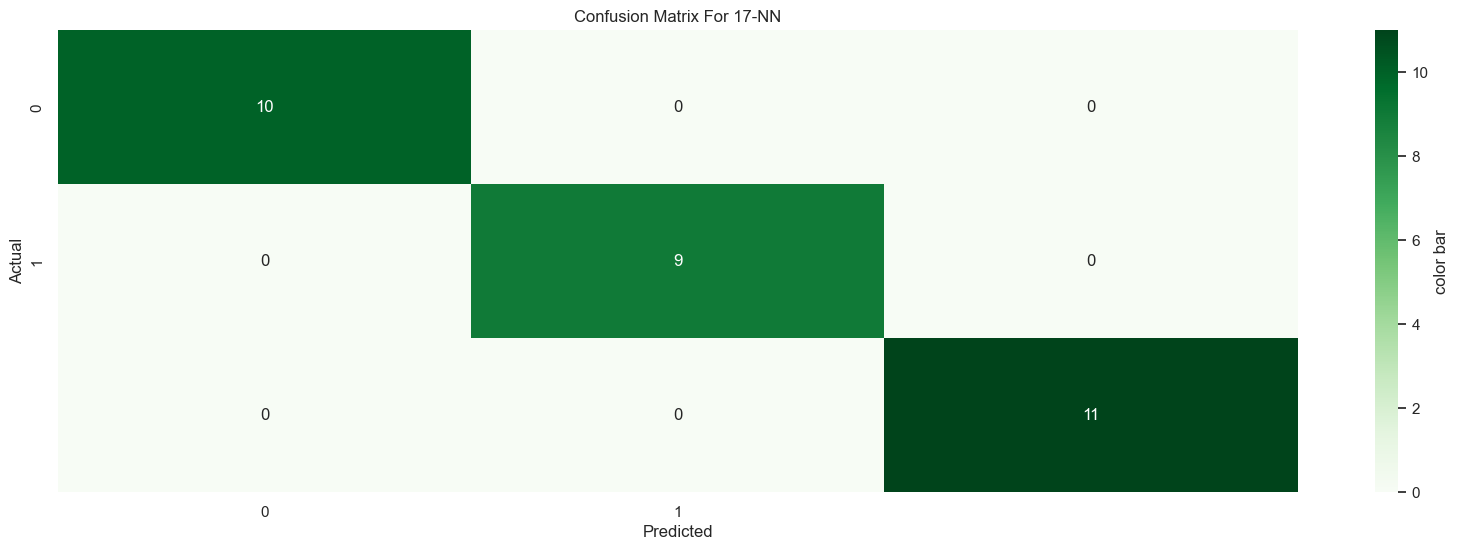

In [108]:
plot_confusion_mat(cm_knn, 'Greens', 'Confusion Matrix For 17-NN')

### Logistic Regression Implementation With Tuned Hypeparameters


In [109]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc

In [110]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load your dataset or use a sample dataset (e.g., Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2022)

# Define the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_dist = {'n_neighbors': np.arange(1, 50)}

# Create RandomizedSearchCV
knn_cv = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

# Evaluate the model on the test set
test_accuracy = knn_cv.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


Best parameters:  {'n_neighbors': 5}
Best score:  0.9523809523809523
Test Accuracy:  0.9777777777777777


In [111]:
lr = LogisticRegression(C = 0.05179474679231213, penalty = 'l2')

In [112]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.05179474679231213)

In [113]:
y_pred_lr = lr.predict(X_test)

In [114]:
lr.score(X_test, y_test)

0.9777777777777777

In [115]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [116]:
print(confusion_matrix(y_test, y_pred_lr))

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [117]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

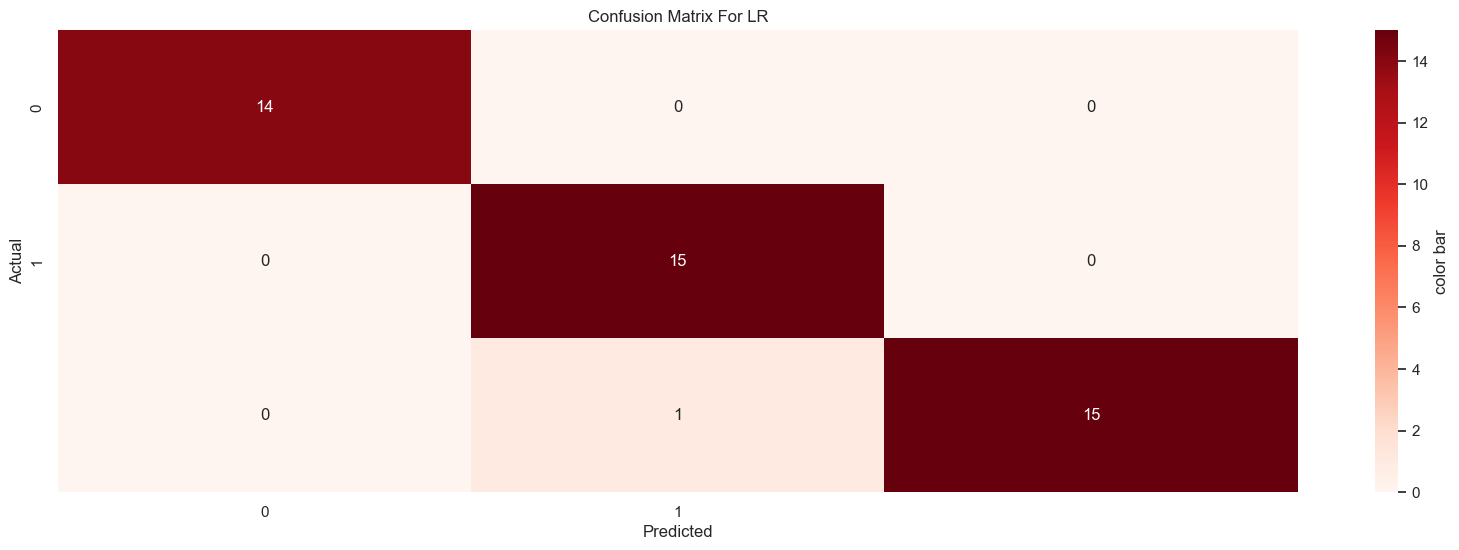

In [118]:
plot_confusion_mat(cm_lr, 'Reds', 'Confusion Matrix For LR')

In [119]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [120]:
def plot_roc(y_test, probs, method):
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print('ROC AUC = %0.2f'%roc_auc)
    plt.plot(fpr, tpr, label = 'AUC=%0.2f'%roc_auc, color  = 'red')
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0, 1], linestyle = '--')
    plt.title('Receiver Characteristic Curve'+ ' For '+ method)
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.show()

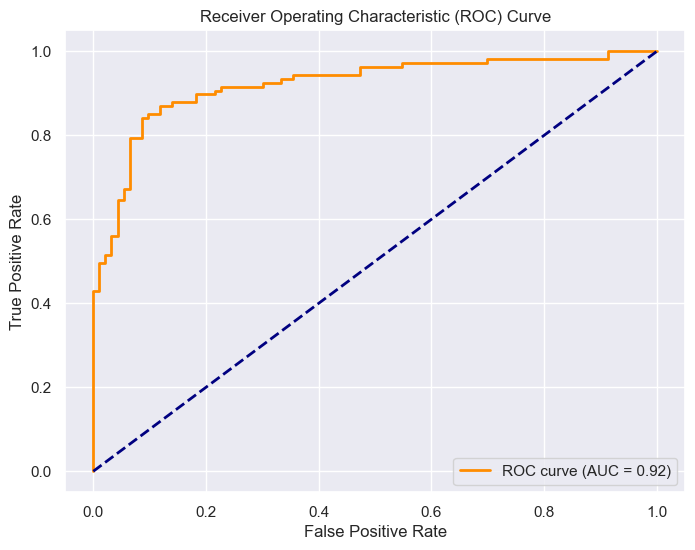

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset for example purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain predicted probabilities for the positive class
y_prob_lr = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Hperparameter tuning for C and penalty  value

In [122]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [123]:
lr = LogisticRegression()

In [124]:
lr_cv = GridSearchCV(lr, param_grid, cv = 5)

In [125]:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [126]:
lr_cv.best_params_

{'C': 0.006105402296585327, 'penalty': 'l2'}

In [127]:
lr_cv.best_score_

0.86875

### Random Forest Implementation With Tuned Hyperparameters

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
X_1 = df.iloc[:,:-1].drop('duration', axis = 1)

In [130]:
y_1 = df.iloc[:, -1]

In [131]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size = 0.4, random_state = 2022)

In [132]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth= 8, max_features = 'sqrt', min_samples_split = 6, n_estimators = 10)

In [133]:
rfc.fit(X_train1, y_train1)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=6,
                       n_estimators=10)

In [134]:
rfc.feature_importances_

array([4.63722235e-03, 4.97493985e-03, 7.31770269e-03, 4.87688118e-03,
       2.26585882e-01, 6.65831659e-01, 3.07530495e-02, 1.26181165e-03,
       2.61097603e-03, 1.33275410e-03, 1.27355160e-03, 4.58692266e-05,
       8.51418357e-03, 1.51195228e-03, 2.73330977e-02, 1.11384678e-02])

In [135]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'age_group', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome'],
      dtype='object')

In [136]:
y_pred_rf = rfc.predict(X_test1)

In [137]:
print(y_pred_rf)

[3 3 3 ... 3 3 3]


In [138]:
rfc.score(X_test1, y_test1)                            #  check performance by accuracy score

0.9382361072712192

In [139]:
print(confusion_matrix(y_test1, y_pred_rf))

[[ 1788     6   150     0]
 [  598    39    83     0]
 [  275     2   337     0]
 [    2     0     1 14804]]


In [140]:
cm_rfc = confusion_matrix(y_test1, y_pred_rf)

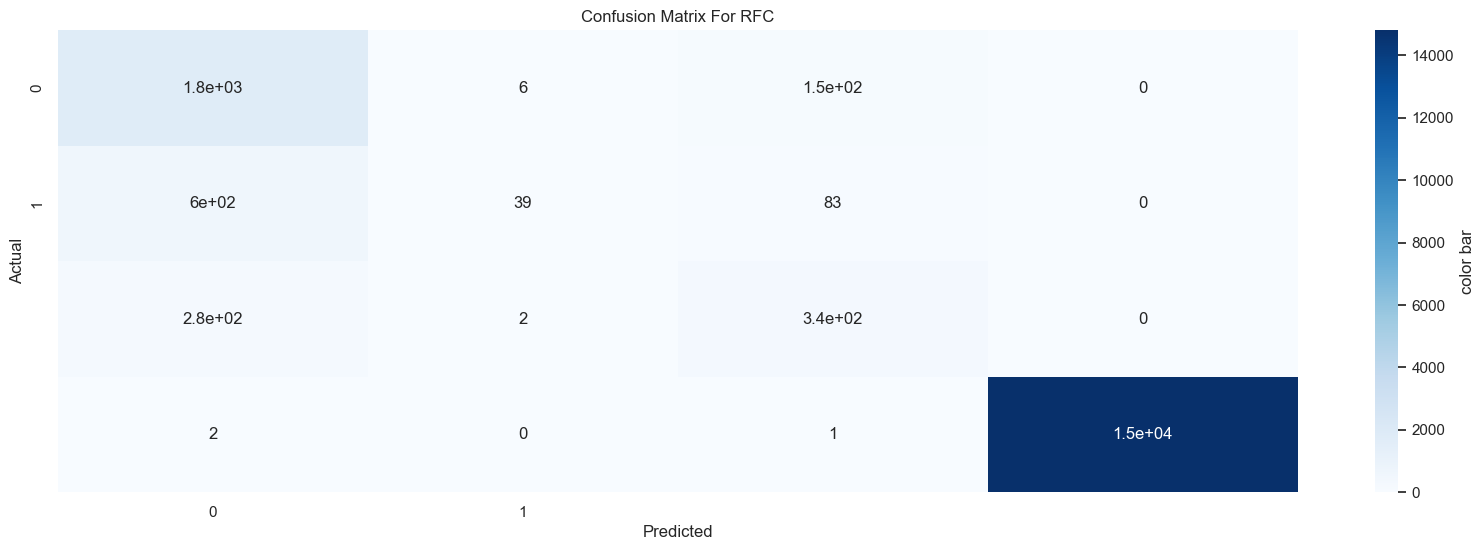

In [141]:
plot_confusion_mat(cm_rfc, 'Blues', 'Confusion Matrix For RFC')

In [142]:
from sklearn.model_selection import cross_val_score     #  check performance by cross validation

In [143]:
cross = cross_val_score(rfc, X_train1, y_train1, cv = 10)

In [144]:
print(np.mean(cross))

0.9370715075562108


In [145]:
print(classification_report(y_test1, y_pred_rf))          # check performance by classification report

              precision    recall  f1-score   support

           0       0.67      0.92      0.78      1944
           1       0.83      0.05      0.10       720
           2       0.59      0.55      0.57       614
           3       1.00      1.00      1.00     14807

    accuracy                           0.94     18085
   macro avg       0.77      0.63      0.61     18085
weighted avg       0.94      0.94      0.93     18085



### Hyperparameter tuning

In [146]:
parameters = {'n_estimators': (10, 30, 50, 70, 90, 100), 'criterion': ('gini', 'entropy'), 'max_depth': (2, 4, 6, 8, 10), 'max_features': ('auto', 'sqrt'), 'min_samples_split': (2, 4, 6, 8, 10)}

In [147]:
rfc_cv = GridSearchCV(rfc, parameters, cv = 5, verbose = True)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define a smaller hyperparameter search space
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(
    rf_classifier, param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [149]:
rfc_cv.fit(X_train1, y_train1)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=8,
                                              min_samples_split=6,
                                              n_estimators=10),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 4, 6, 8, 10),
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_split': (2, 4, 6, 8, 10),
                         'n_estimators': (10, 30, 50, 70, 90, 100)},
             verbose=True)

In [150]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 90}

In [151]:
rfc_cv.best_score_

0.9382141761547489

In [152]:
y_prob_rfc = rfc.predict_proba(X_test1)[:, 1]

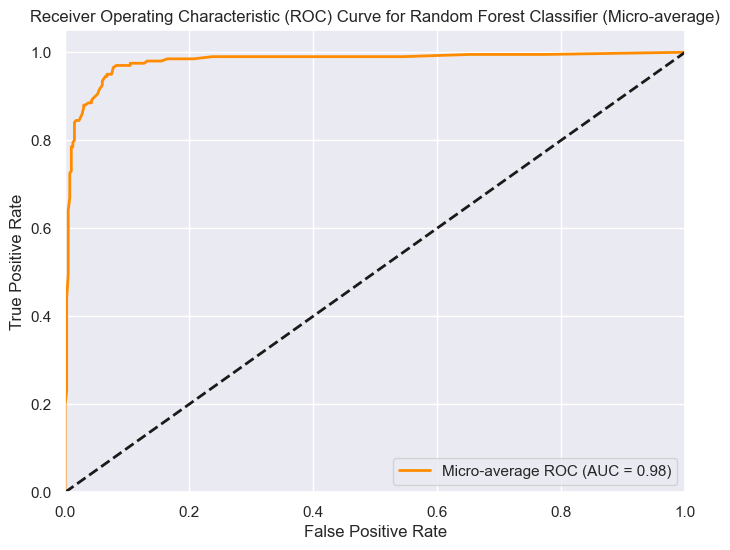

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Generate a multiclass dataset with fewer clusters per class
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the labels for each class
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_prob_rfc = rf_classifier.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob_rfc.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier (Micro-average)')
plt.legend(loc="lower right")
plt.show()


### Quadratic Discriminant Analysis Implementation

In [154]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [155]:
qda = QDA()

In [156]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [157]:
y_pred_qda = qda.predict(X_test)

In [158]:
qda.score(X_test, y_test)

0.81

In [159]:
print(confusion_matrix(y_test, y_pred_qda))

[[37 10 19]
 [ 2 54  5]
 [ 1  1 71]]


In [160]:
cm_qda = confusion_matrix(y_test, y_pred_qda)

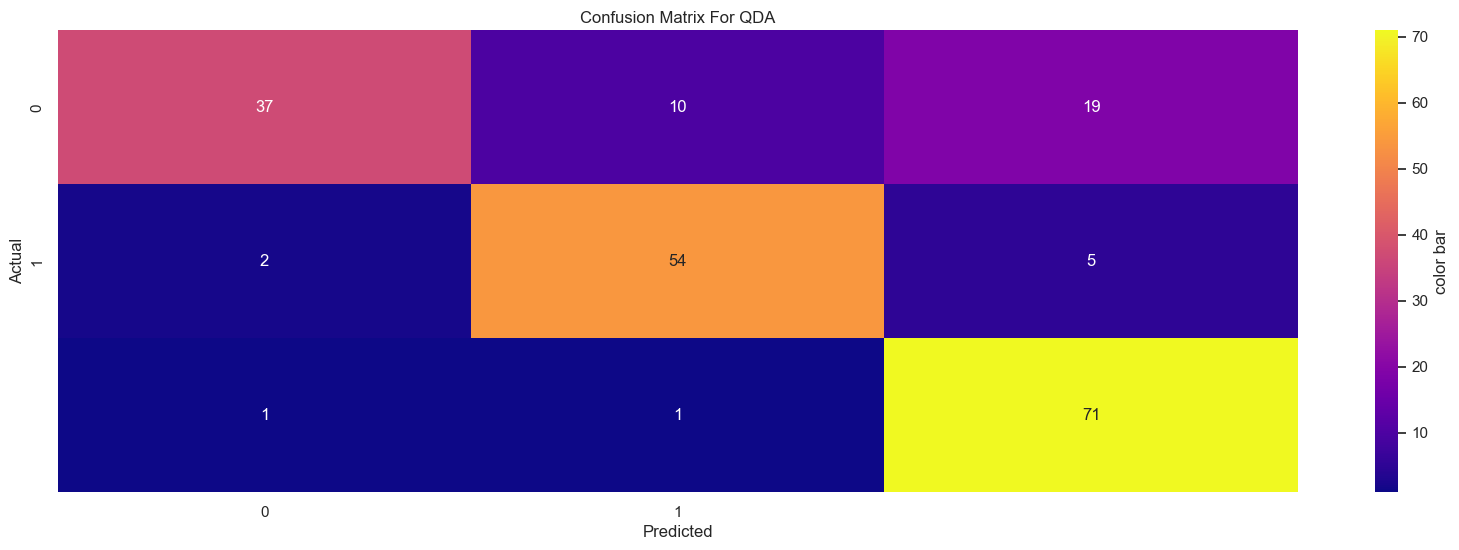

In [161]:
plot_confusion_mat(cm_qda, 'plasma', 'Confusion Matrix For QDA')

In [162]:
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        66
           1       0.83      0.89      0.86        61
           2       0.75      0.97      0.85        73

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.80       200
weighted avg       0.83      0.81      0.80       200



In [163]:
y_prob_qda = qda.predict_proba(X_test)[:, 1]   # predict probability

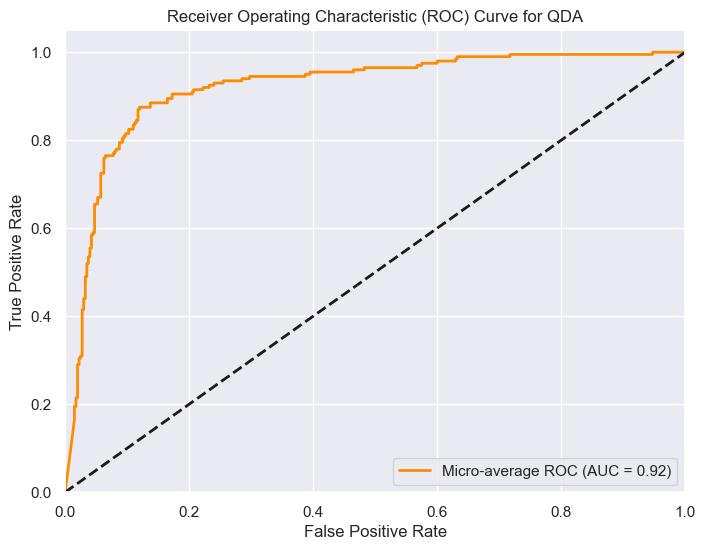

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming you have your data loaded and split into X_train, X_test, y_train, y_test

# Initialize the Quadratic Discriminant Analysis (QDA) model
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_prob_qda = qda_classifier.predict_proba(X_test)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob_qda.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for QDA')
plt.legend(loc="lower right")
plt.show()


### Compare The Classification Methods Used by ROC Curves

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


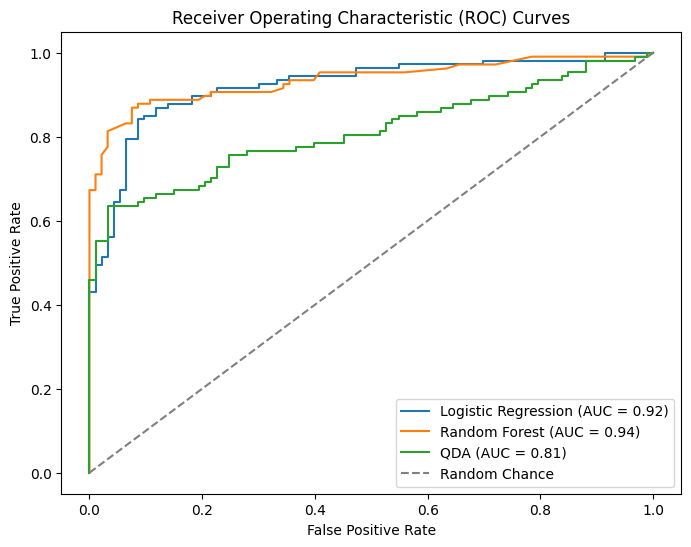

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

# Generate sample data (replace this with your data loading)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
qda_classifier = QuadraticDiscriminantAnalysis()

# Fit models
lr_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
qda_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob_lr = lr_classifier.predict_proba(X_test)[:, 1]
y_prob_rfc = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_qda = qda_classifier.predict_proba(X_test)[:, 1]

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

# Quadratic Discriminant Analysis
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)
plt.plot(fpr_qda, tpr_qda, label=f'QDA (AUC = {roc_auc_qda:.2f})')

# Plot random chance (dashed line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()
